[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dapivei/causal-infere/blob/main/sections/4_Statistics_and_Experiments.ipynb)

$$
\begin{array}{c}
\textbf{HYPOTHESIS TESTING AND INTRODUCTION TO EXPERIMENTS}\\\\\\\\
\textbf{Daniela Pinto Veizaga, Xiang Pan, and Xiang Gao} \\
\textit{Center for Data Science, New York University} \\\\\\
\textit{September 27, 2024}
\end{array}
$$


## 0. Recap from last class
- Conditional variance, weak law of large numbers, central limit theorem!

## 1. Goals for today

- Review hypothesis testing.
- A final review of Statistics.
- Experiments, an introduction.


## 2. Hypothesis Testing


A key goal in causal inference is to make informed decisions based on sample data. Hypothesis testing helps us decide whether to **accept** or **reject** a claim about a population parameter based on evidence from our data.

### Key Concepts

1. **Null Hypothesis ($H_0$)**:  
   Represents the default assumption we aim to **disprove**. For example, in a medical trial, it might state that a new treatment has no effect.

2. **Alternative Hypothesis ($H_1$)**:  
   What we want to **prove** through analysis, proposing an outcome different from $H_0$. For instance, it may claim that the new treatment **does** have an effect.

3. **Test Statistic ($T_n$)**:  
   A measure of how far our sample data deviates from expectations under $H_0$, quantifying the strength of evidence against it.

4. **Critical Value ($c$)**:  
   A threshold defining what is “significant” evidence. If our test statistic exceeds this value, we reject $H_0$.

5. **Decision Rule**:  
   If the test statistic is greater than the $c$, we reject $H_0$ in favor of $H_1$. If it's less than or equal to the critical value, we **fail to reject** $H_0$. Note that failing to reject $H_0$ does not prove it true; it just indicates insufficient evidence against it.

> **Significance** ($\alpha$) and **P-Value**: A result is considered **significant** if the evidence against $H_0$ is strong. The **p-value** measures this evidence. It indicates the probability of observing data as extreme as ours if $H_0$ were true. A low p-value (typically < 0.05) suggests strong evidence against $H_0$.


Now, let's apply our hypothesis testing framework by simulating a dataset and examining the results.

#### a) Simulate a Dataset

We'll start by generating a dataset from a normal distribution, specifically $X \sim N(5, 1.5)$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from IPython.display import display, Math

In [2]:
np.random.seed(42)
mu, sigma= 5.0, 1.5
sample = np.random.normal(loc=mu, scale=sigma, size=1000)

In [3]:
sample[:10]

array([5.74507123, 4.79260355, 5.97153281, 7.28454478, 4.64876994,
       4.64879456, 7.36881922, 6.15115209, 4.29578842, 5.81384007])

In [4]:
n = len(sample)
sample_mean = np.mean(sample)
sample_std = np.std(sample)

#### b) Define our hypothesis

Our null hypothesis ($H_0$) states that the population mean is equal to 8. The alternative hypothesis ($H_1$) suggests that the mean is different from this value.





$$H_0: \mathbb{E}[X] =8, \quad H_1: \mathbb{E}[X] \neq 8.$$



In [5]:
mu_0=8

####  c) Set a significance level $\alpha$



The significance level $\alpha$ is the threshold we set for deciding how much evidence we need to reject $H_0$. It represents the risk we are willing to accept for falsely rejecting the $H_0$ (Type I error). Common choices for 𝛼 are
0.05 or
0.01. This means we are willing to accept a 5% or 1% chance of making an error.

In [6]:
# Significance level
alpha=0.05

#### d) Compute $T_n$

To quantitatively assess whether our sample provides enough evidence to reject $H_0$, we use the t-test statistic:

$$T_n = \frac{\sqrt{n}}{\hat{\sigma}_n} \left( |\overline{X_n} - \mu_0| \right).$$

$T_n$ measures how far our sample mean ($\overline{X_n}$) is from the hypothesized mean ($\mu_0$). The larger the value of $T_n$, the more evidence we have against the null hypothesis ($H_0$).

> Recall that, as the sample size  $n$ increases, the distribution of the sample mean $\bar{X_n}$ approaches normality due to the Central Limit Theorem (CLT):

$$
\bar{X_n} \sim N(\mu, \frac{\sigma}{\sqrt{n}})
$$

This implies,

$$
T_n \sim N(0, 1).
$$

This property enables the use of normal distribution properties to derive critical values, calculate p-values, and make informed decisions based on statistical evidence.


In [7]:
def compute_test_statistic(sample_mean, sample_std, mu_0):
    T_n = np.sqrt(n) * abs(sample_mean - mu_0) / sample_std
    return T_n

In [8]:
T_n = compute_test_statistic(sample_mean, sample_std, mu_0)
display(Math(f"T_n: {T_n}"))

<IPython.core.display.Math object>

#### e) Define the critical value $c$

To determine the critical value $c$, we want to find the value such that:

$$
2\big(1 - \Phi(c)\big) = \alpha,
$$

where $\Phi$ is the CDF of the standard normal distribution. The factor of 2 accounts for the two-sided nature of our test. For more details on how this was derived, please refer to lecture notes.


- Rearranging this equation helps us find $\Phi(c) $:

   $$
   \Phi(c) = 1 - \frac{\alpha}{2}
   $$

This gives us the critical value that corresponds to our chosen $\alpha$.

In [9]:
critical_value = stats.norm.ppf(1 - alpha / 2)
display(Math(f"\\text{{For }} \\alpha = {alpha}, \\text{{the critical value}} \, c \,\\text{{is}} \, {round(critical_value, 2)}"))


<IPython.core.display.Math object>


> Understanding the Type I Error Rate: By setting a critical value $c$, we control the Type I error rate. I.e., if $H_0$ is true, the probability that our test statistic falls beyond $c$ (rejection region) is equal to $\alpha$:

$$
P(T_n > c) = \alpha.
$$




#### f) $p_n$


To measure the strength of evidence against the null hypothesis ($H_0$), we estimate the p-value $\hat{p_n}$:

$$
\hat{p_n} = 2(1 - \Phi(T_n)).
$$

This p-value tells us the smallest significance level $\alpha$ at which we would reject $H_0$. If $T_n$ is large, $\hat{p_n}$ will be small, indicating strong evidence against $H_0$. A smaller p-value means the observed data is very unlikely under the null hypothesis.

In [10]:
def compute_p_value(T_n):
    p_value = 2 * (1 - stats.norm.cdf(T_n))
    return p_value

In [11]:
p_value = compute_p_value(T_n)
display(Math(f"\\hat p_n = {round(p_value, 10)}"))

<IPython.core.display.Math object>

A **p-value of 0.0** (or very close to 0) suggests **strong evidence against the null hypothesis**. In other words, the difference between the sample mean and the population mean is statistically significant.

* Typically, if the p-value is below a chosen significance level (e.g., 0.05), we reject the null hypothesis.

Alternatively, we could use a predefined function within the SciPy library to perform a one-sample t-test.

In [12]:
stats.ttest_1samp(sample, mu_0)

TtestResult(statistic=-63.9636442573448, pvalue=0.0, df=999)

In [13]:
stats.t.ppf(q=0.025, df=n-1)

-1.962341461133449

In [14]:
stats.t.ppf(q=0.975, df=n-1)

1.9623414611334487

#### g) Confidence Sets

For a two-sided test, the confidence interval is given by:
$$
C_n = \left[\overline{X_n} \pm \frac{\hat{\sigma}_n}{\sqrt{n}} \Phi^{-1}\left(1 - \frac{\alpha}{2}\right)\right]
$$


where $\frac{\hat{\sigma}_n}{\sqrt{n}} \Phi^{-1}\left(1 - \frac{\alpha}{2}\right)$ represents the margin of error around the sample mean.

This interval will give us a range of values that, with a certain level of confidence (typically 95%), is likely to contain the true population mean.

In [15]:
def compute_confidence_interval(sample_mean, sample_std, n, alpha):
    z_critical = stats.norm.ppf(1 - alpha / 2)
    margin_of_error = z_critical * (sample_std / np.sqrt(n))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    return confidence_interval

In [16]:
confidence_interval = compute_confidence_interval(sample_mean, sample_std, n, alpha)
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (4.9380066375012746, 5.119989529965702)



Finally, we can visualize the results using a plot that includes the simulated sample, the sample mean, the hypothesized mean, and the confidence interval.


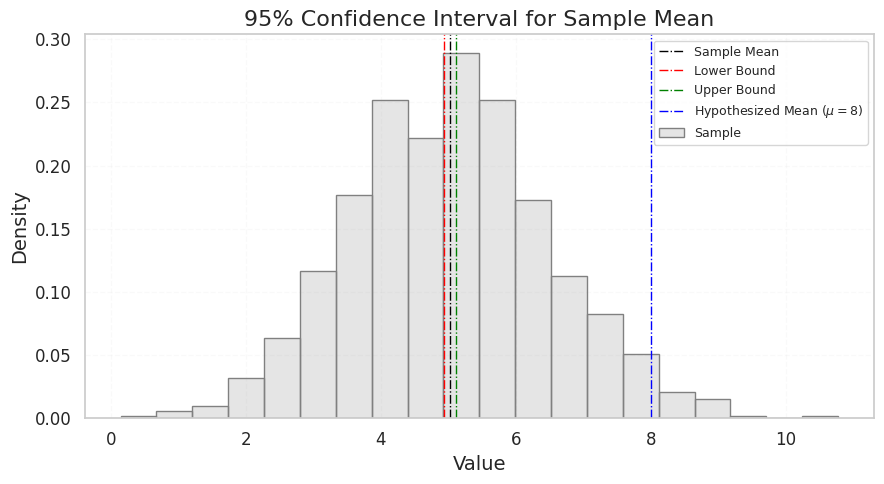

In [17]:
sns.set(style='whitegrid', palette='deep')
plt.figure(figsize=(9, 5))
sns.histplot(sample, bins=20, stat="density", color='grey', edgecolor='grey', alpha=0.2, label='Sample')
plt.axvline(np.mean(sample), color='black', linestyle='-.', linewidth=1, label="Sample Mean")
plt.axvline(confidence_interval[0], color='red', linestyle='-.', linewidth=1, label="Lower Bound")
plt.axvline(confidence_interval[1], color='green', linestyle='-.', linewidth=1, label="Upper Bound")
plt.axvline(mu_0, color='blue', linestyle='-.', linewidth=1, label="Hypothesized Mean ($\mu = 8$)")
plt.title("95% Confidence Interval for Sample Mean", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.1)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


## 3. Statistics (final recap)

Consider the following example: estimating Instagram followers.


1. **Population Parameter ($\mu_x$)**: The unknown true average number of Instagram followers for all NYU students.
   
2. **Population**: The entire group of NYU students, which is too large to fully survey in most cases.

3. **Sample**: A smaller group of students selected from the population to gather data on their Instagram followers.

4. **Estimator**: The sample average, denoted by $ \overline{X_n} $, which serves as an estimate of the population parameter $ \mu_x $.

5. **Estimate**: The specific value of the sample average, such as $ \overline{x_A} $ for Student A’s sample or $ \overline{x_B} $ for Student B’s sample.

6. **Random Variable**: The estimator $ \overline{X_n} $ is a random variable because its value depends on the sample chosen, and different samples will yield different estimates.


>  Things to Consider:
- **How should we choose the sample?**
- **What would happen if we only interviewed our NYU Instagram followers as our sample?**
- **How many students do we need to survey for a reliable sample?**

Now, imagine each of us takes a sample and calculates the average number of Instagram followers. For example, Student A selects a sample and computes an average, denoted $ \overline{x_A} $, which we refer to as an **estimate**. However, if Student B had taken a different sample, their estimate $ \overline{x_B} $ would likely be different, because the estimator $ \overline{X_n} $ is a **random variable**, as its value depends on the specific sample chosen.

> What if we don’t require everyone to use the average as an estimator?

Each of us could choose a different strategy (estimator), and we would need to compare these estimators using concepts like **unbiasedness** and **efficiency**. Let's suppose that our best estimator from all the available options in the classroom is given by

$$
\bar{x}_n = \frac{1}{n} \sum_{i=1}^{n} x_i = 250
$$

$$
\sigma^2_{\bar{x}} = \frac{\sigma^2_x}{n} = 2500
$$


Now, imagine a student claims to be quite popular with 100 Instagram followers. However, our sample estimate indicates that the average number of followers is 250. The student might chuckle and argue that the true population average $\mu_x$ is actually 150.

> Can we definitively prove this student wrong?


No, but using statistics, we can estimate how **likely** it is to get an average of 250 if $\mu_x$ is 150. This is where **hypothesis testing** comes into play.

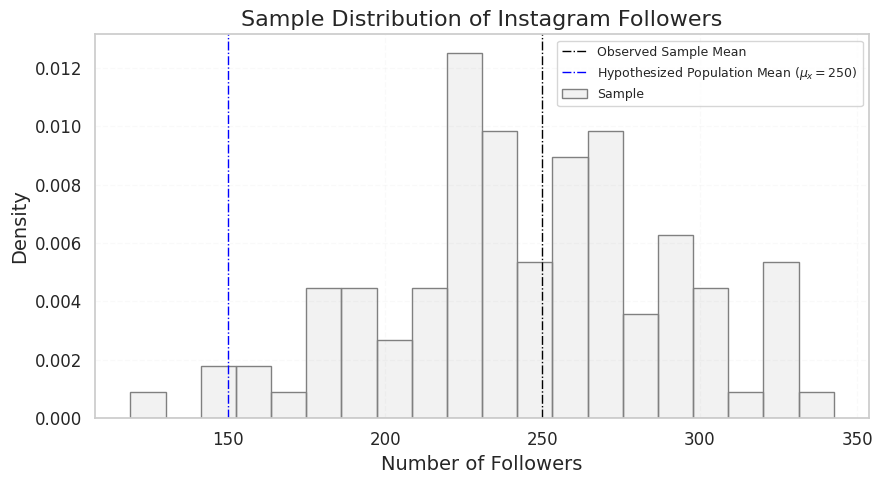

In [18]:
# Parameters
sample_mean = 250
std_dev = 50
sample_size = 100
mu_x = 150

# Simulating sample data
np.random.seed(42)
sample = np.random.normal(loc=sample_mean, scale=std_dev, size=sample_size)

# Plotting
sns.set(style='whitegrid', palette='deep')
plt.figure(figsize=(9, 5))
sns.histplot(sample, bins=20, stat="density", color='grey', edgecolor='grey', alpha=0.1, label='Sample')
plt.axvline(sample_mean, color='black', linestyle='-.', linewidth=1, label="Observed Sample Mean")
plt.axvline(mu_x, color='blue', linestyle='-.', linewidth=1, label="Hypothesized Population Mean ($\mu_x = 250$)")
plt.title("Sample Distribution of Instagram Followers", fontsize=16)
plt.xlabel("Number of Followers", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.1)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


**Hypotheses**:
- $H_0$: The true mean number of followers is 150.
- $H_1$: The true mean number of followers is not 150.
   

In [19]:
T_n = compute_test_statistic(sample_mean, std_dev, mu_x)
display(Math(f"T_n: {T_n}"))


<IPython.core.display.Math object>

In [20]:
p_value = compute_p_value(T_n)
display(Math(f"\\hat p_n = {round(p_value, 10)}"))

<IPython.core.display.Math object>

Given these results, we can:

- **Reject the Null Hypothesis**: The data provides very strong evidence against the null hypothesis ($H_0: \mu = 150$). This means that it is highly unlikely that the true population mean is \(150\). There is strong evidence to suggest that the true population mean is significantly higher than \(150\).

# 3. Experiments


Let's say we want to understand the effect of a job training program (S) on wages (Y) (example seen last lecture). To estimate this causal effect, the government launches a survey asking households if they've participated in job training programs through public libraries or other resources.

> Can we truly estimate causal effects from this data? How could unmeasured factors ($U$), influence our estimates? Consider how these factors can complicate our understanding of the true impact of job training on wages.


Let’s visualize this in an observational setting using a Directed Acyclic Graph (DAG), where our outcome of interest is wage (\(Y\)).

In [21]:
import networkx as nx

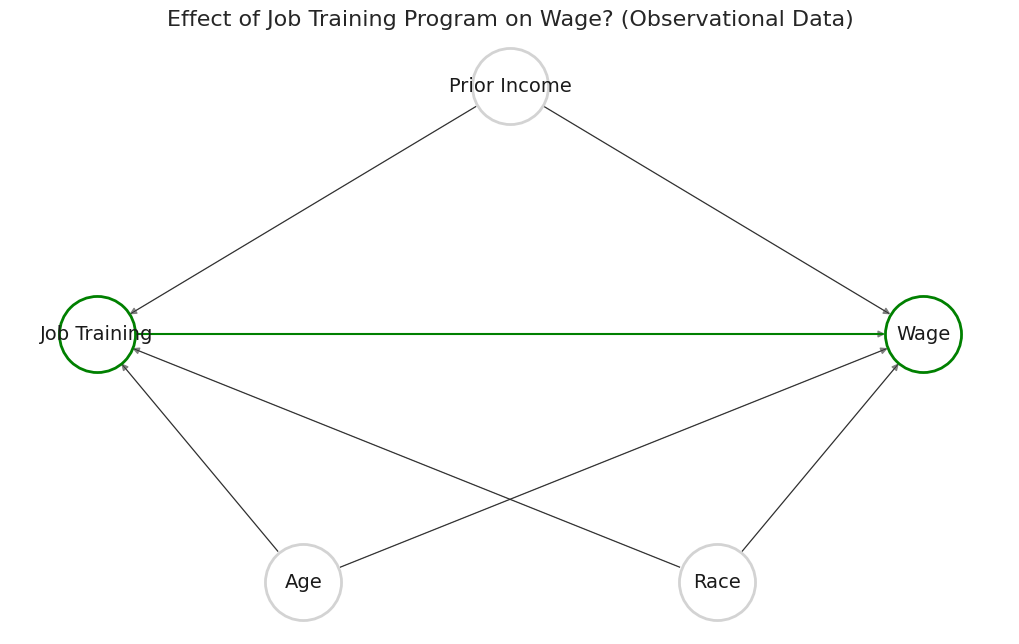

In [22]:


G = nx.DiGraph()

edges = [
    ('Job Training', 'Wage'),
    ('Age', 'Job Training'),
    ('Age', 'Wage'),
    ('Race', 'Job Training'),
    ('Race', 'Wage'),
    ('Prior Income', 'Job Training'),
    ('Prior Income', 'Wage'),
]

G.add_edges_from(edges)

pos = {
    'Job Training': (1, 2),
    'Wage': (5, 2),
    'Age': (2, 1),
    'Race': (4, 1),
    'Prior Income': (3, 3)
}
node_colors = ['white' for _ in G.nodes()]
outline_colors = ['green' if node in ['Wage', 'Job Training'] else 'lightgray' for node in G.nodes()]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=3000, node_color=node_colors, font_size=14, edge_color='gray', linewidths=2)

for node, color in zip(G.nodes(), outline_colors):
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='white', edgecolors=color, linewidths=2, node_size=3000)

for edge in edges:
    if edge == ('Job Training', 'Wage'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=1.5, edge_color='green')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=0.5)

plt.title('Effect of Job Training Program on Wage? (Observational Data)', fontsize=16)
plt.gca().set_facecolor('whitesmoke')
plt.axis('off')  # Turn off the axis
plt.grid(False)  # Turn off grid
plt.show()



Here:

- $ U $ represents confounding factors such as education, experience, and socioeconomic status. These factors influence both the likelihood of participating in the job training program ($ S $) and the wages or income ($ Y $).
- The arrow from $ U $ to $ S $ indicates that individuals with higher education or more experience are more likely to enroll in job training programs.
- $ U $ affects $ Y $ because education and experience are key determinants of wages.
- Participation in the job training program ($ S $) directly influences wages ($ Y $), as the training may enhance skills and lead to higher income.

*Confounding bias* occurs because the relationship from $ S $ to $ Y $ is affected by $ U $. This makes it difficult to separate the true impact of the training ($ S $) from the influence of the confounding factors ($ U $). As a result, we might observe that the average wage for participants in the training is lower than the average wage for the broader population that could benefit from such training:

$$ \mathbb{E}[Y(S = 1, U)|S = 1] < \mathbb{E}[Y(S = 1, U)]. $$

Suggesting that individuals who opt to participate in the training might already be facing challenges that lead to lower wages, causing the training to appear less effective than it truly is.

> To address this issue, we use randomized controlled trials (RCTs) to isolate the effect of the training. By randomizing treatment assignment, we ensure that $ S $ is independent of $ U $ ($ S \perp U $). Note, while $ S $ still directly affects $ Y $, and $ U $ continues to influence $ Y $ (since factors like education and experience impact wages), $ U $ no longer has any effect on $ S $.




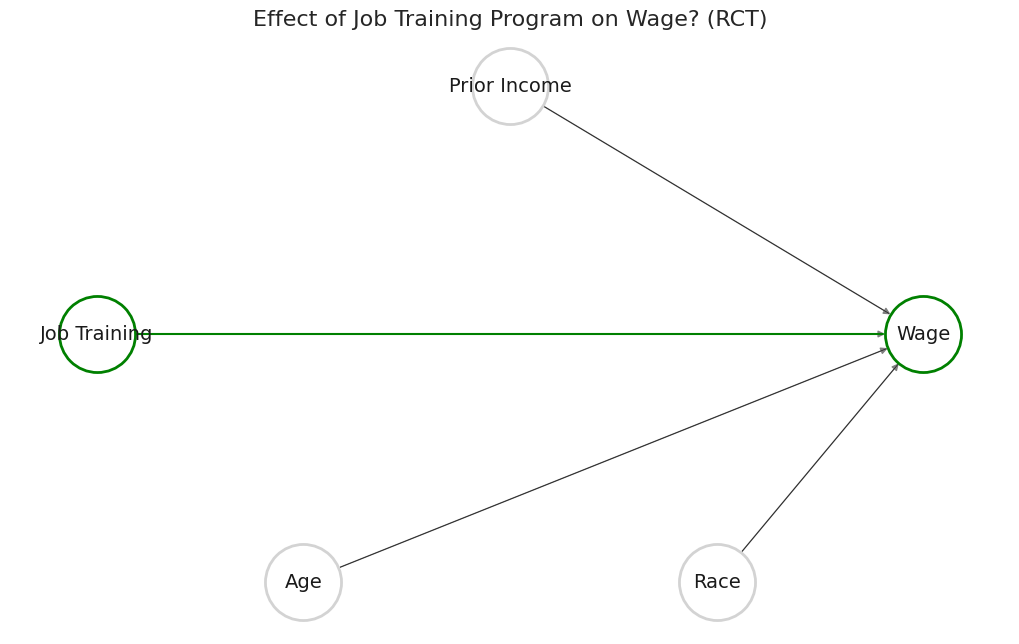

In [23]:
G = nx.DiGraph()

edges = [
    ('Job Training', 'Wage'),
    ('Age', 'Wage'),
    ('Race', 'Wage'),
    ('Prior Income', 'Wage'),
]

G.add_edges_from(edges)

pos = {
    'Job Training': (1, 2),
    'Wage': (5, 2),
    'Age': (2, 1),
    'Race': (4, 1),
    'Prior Income': (3, 3)
}
node_colors = ['white' for _ in G.nodes()]
outline_colors = ['green' if node in ['Wage', 'Job Training'] else 'lightgray' for node in G.nodes()]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=3000, node_color=node_colors, font_size=14, edge_color='gray', linewidths=2)

for node, color in zip(G.nodes(), outline_colors):
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='white', edgecolors=color, linewidths=2, node_size=3000)

for edge in edges:
    if edge == ('Job Training', 'Wage'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=1.5, edge_color='green')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=0.5)

plt.title('Effect of Job Training Program on Wage? (RCT)', fontsize=16)
plt.gca().set_facecolor('whitesmoke')
plt.axis('off')  # Turn off the axis
plt.grid(False)  # Turn off grid
plt.show()

## 4. Path Forward

- Estimate the **causal effect** of a job training program rolled by the **National Supported Work (NSW) Demonstration**.
  -  The program involved **randomization** in assigning participants to treatment (those who received the program) and control (those who did not).
  - This design allows us to compare outcomes between the two groups to determine the program's impact.


---

**References:**


[^1]: Lalonde, R. J. (1986). *Evaluating the Econometric Evaluations of Training Programs with Experimental Data.* American Economic Review, 76(4), 604-620.
